The Data
This is the data behind the story Be Suspicious Of Online Movie Ratings, Especially Fandango’s openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
fandango_data = pd.read_csv("fandango_scrape.csv")

the relationship between popularity of a film and its rating in sactterplot

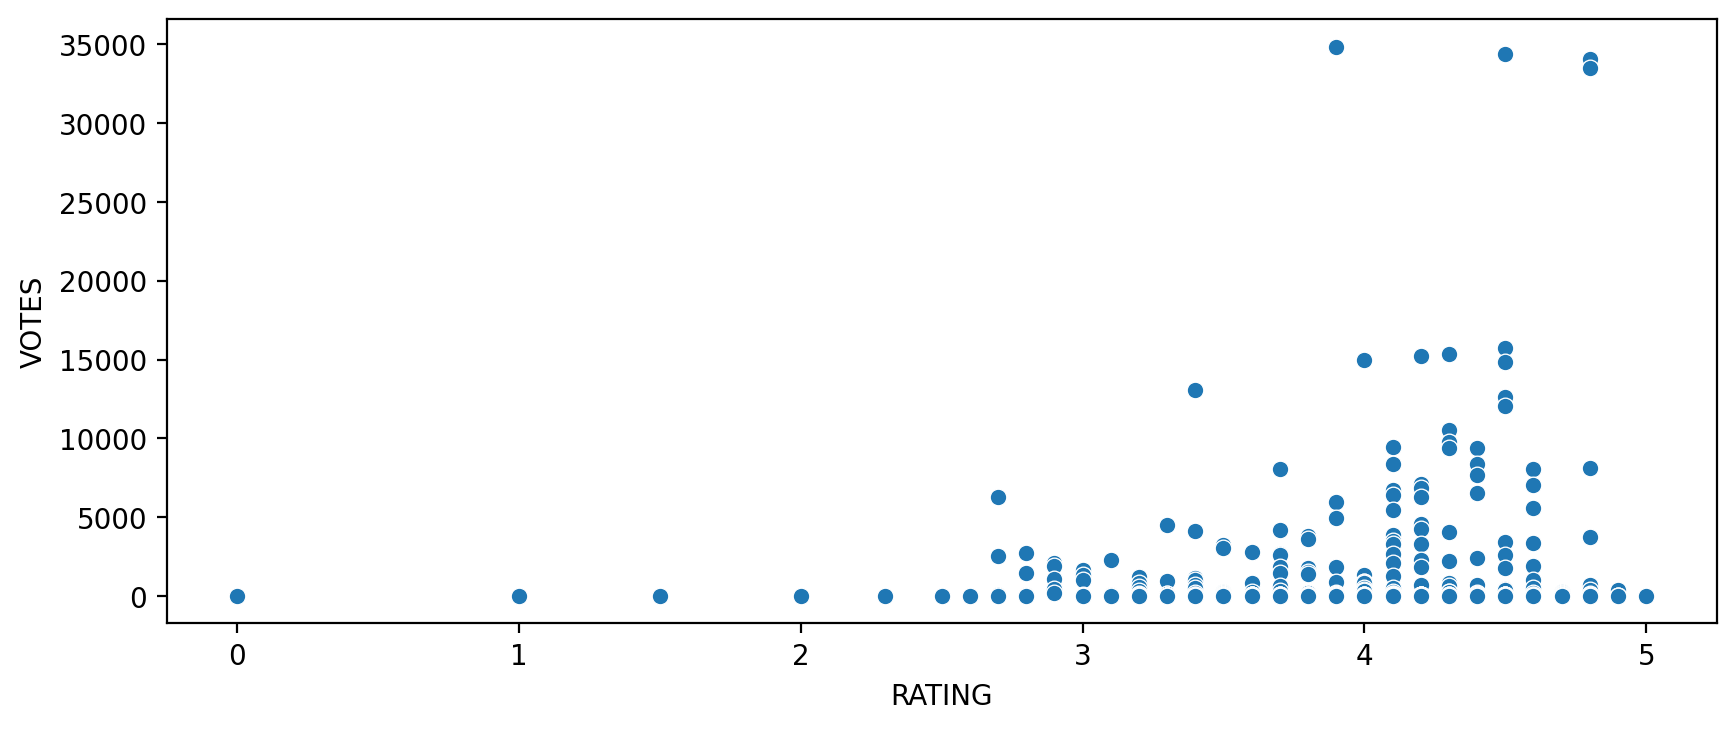

In [28]:
plt.figure(figsize=(10,4),dpi = 200)
sns.scatterplot(data= fandango_data, y = 'VOTES', x = 'RATING')
plt.show()

In [29]:
#correlation
fandango_data.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [30]:
#getting the year for each film
fandango_data['YEAR'] = fandango_data['FILM'].apply(lambda x: x.split('(')[-1].replace(')',''))
fandango_data['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

In [31]:
fandango_data['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

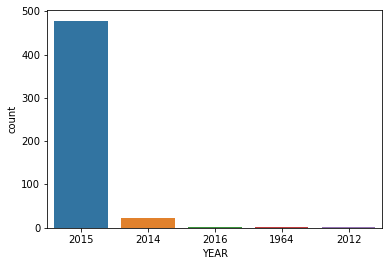

In [32]:
#visualize in a countplot
sns.countplot(data=fandango_data, x='YEAR')
plt.show()

In [33]:
#getting the top 10 films with votes
fandango_data.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [34]:
#removing films with 0 votes
reviewed_films = fandango_data[fandango_data['VOTES'] > 0]
reviewed_films

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


KDE plot that displays the distribution of ratings that are displayed (STARS) vs what the true rating was from votes (RATING).

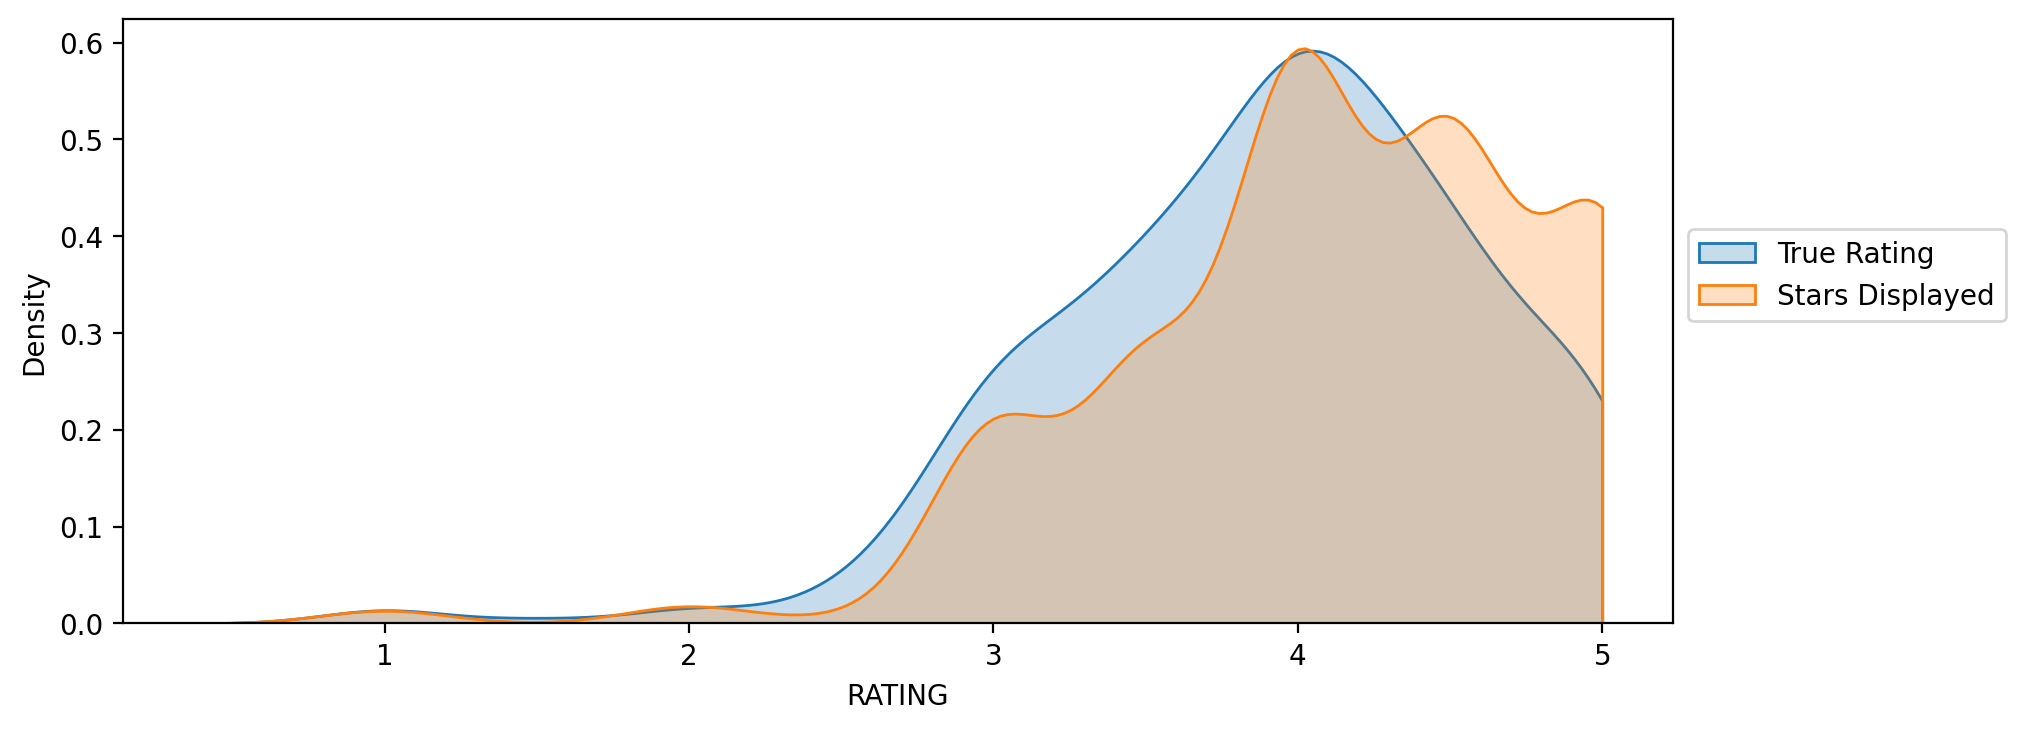

In [35]:
plt.figure(figsize = (10,4), dpi = 200)
sns.kdeplot(data = reviewed_films, x='RATING',clip=[0,5],fill = True, label = 'True Rating')
sns.kdeplot(data = reviewed_films, x='STARS',clip=[0,5],fill = True, label = 'Stars Displayed')
plt.legend(loc= (1.01,0.5))
plt.show()

In [37]:
#getting the difference between the starts and the rating
reviewed_films['REVIEW DIFF'] = (reviewed_films['STARS'] - reviewed_films['RATING']).round(2)

C:\Users\danny\AppData\Local\Temp\ipykernel_13604\2711638092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films['REVIEW DIFF'] = (reviewed_films['STARS'] - reviewed_films['RATING']).round(2)


In [38]:
reviewed_films

,FILM,STARS,RATING,VOTES,YEAR,REVIEW DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


Countplot for the REVIEW DIFF column

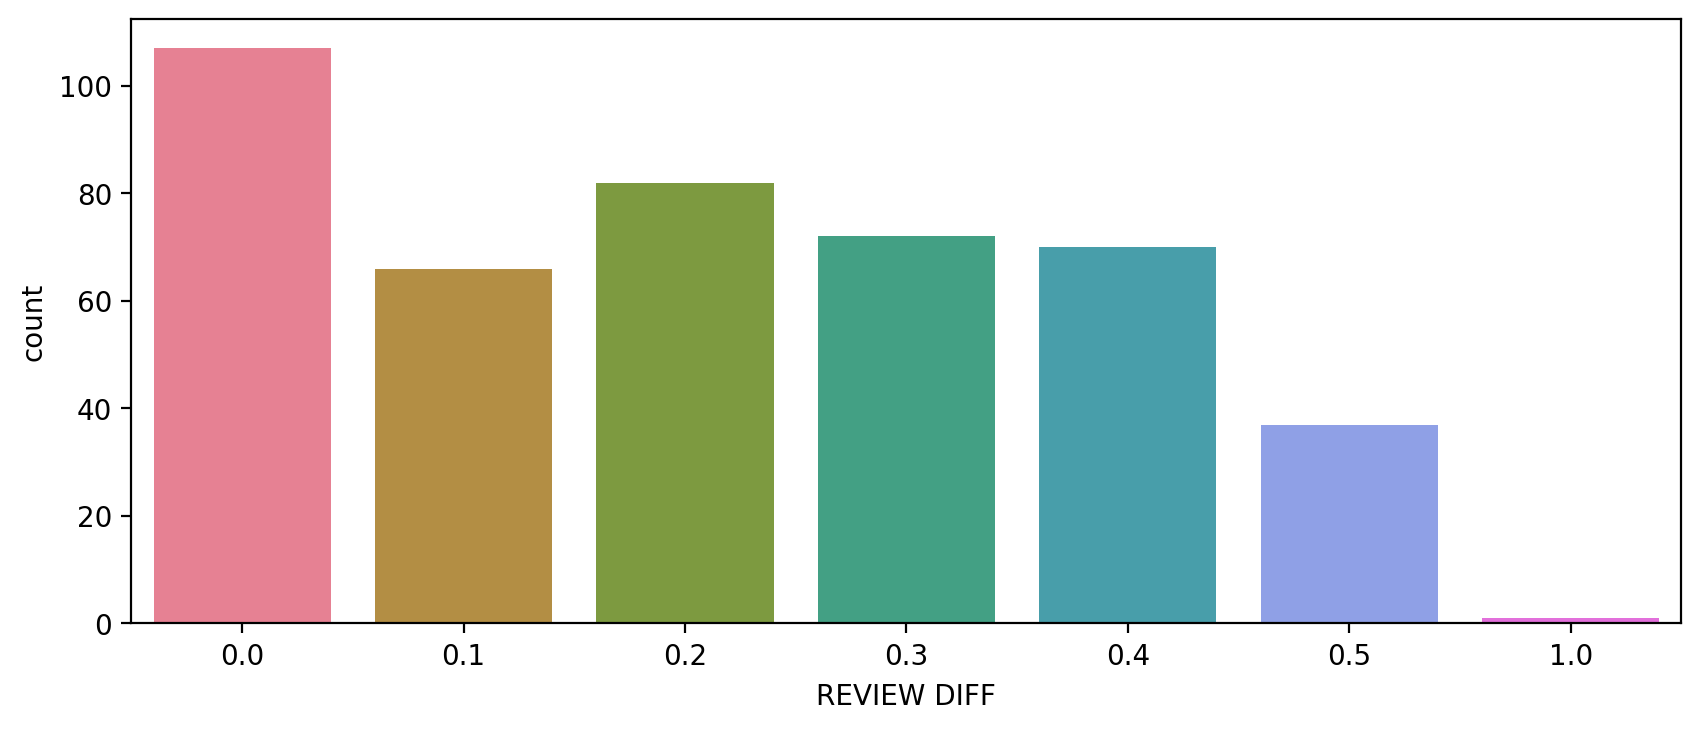

In [39]:
plt.figure(figsize=(10,4),dpi = 200)
sns.countplot(data = reviewed_films, x='REVIEW DIFF',palette='husl')
plt.show()

In [40]:
#getting the movies with the 2 REVIEW DIFF 
reviewed_films[reviewed_films['REVIEW DIFF'] >= 1]

,FILM,STARS,RATING,VOTES,YEAR,REVIEW DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparing to the second set of data

In [41]:
rating_sites = pd.read_csv("all_sites_scores.csv")

In [42]:
rating_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


## Rotten Tomatoes

scatterplot for the relation between the Rotten Tomatoes rating vs the Rotten Tomatoes user rating

(0.0, 100.0)

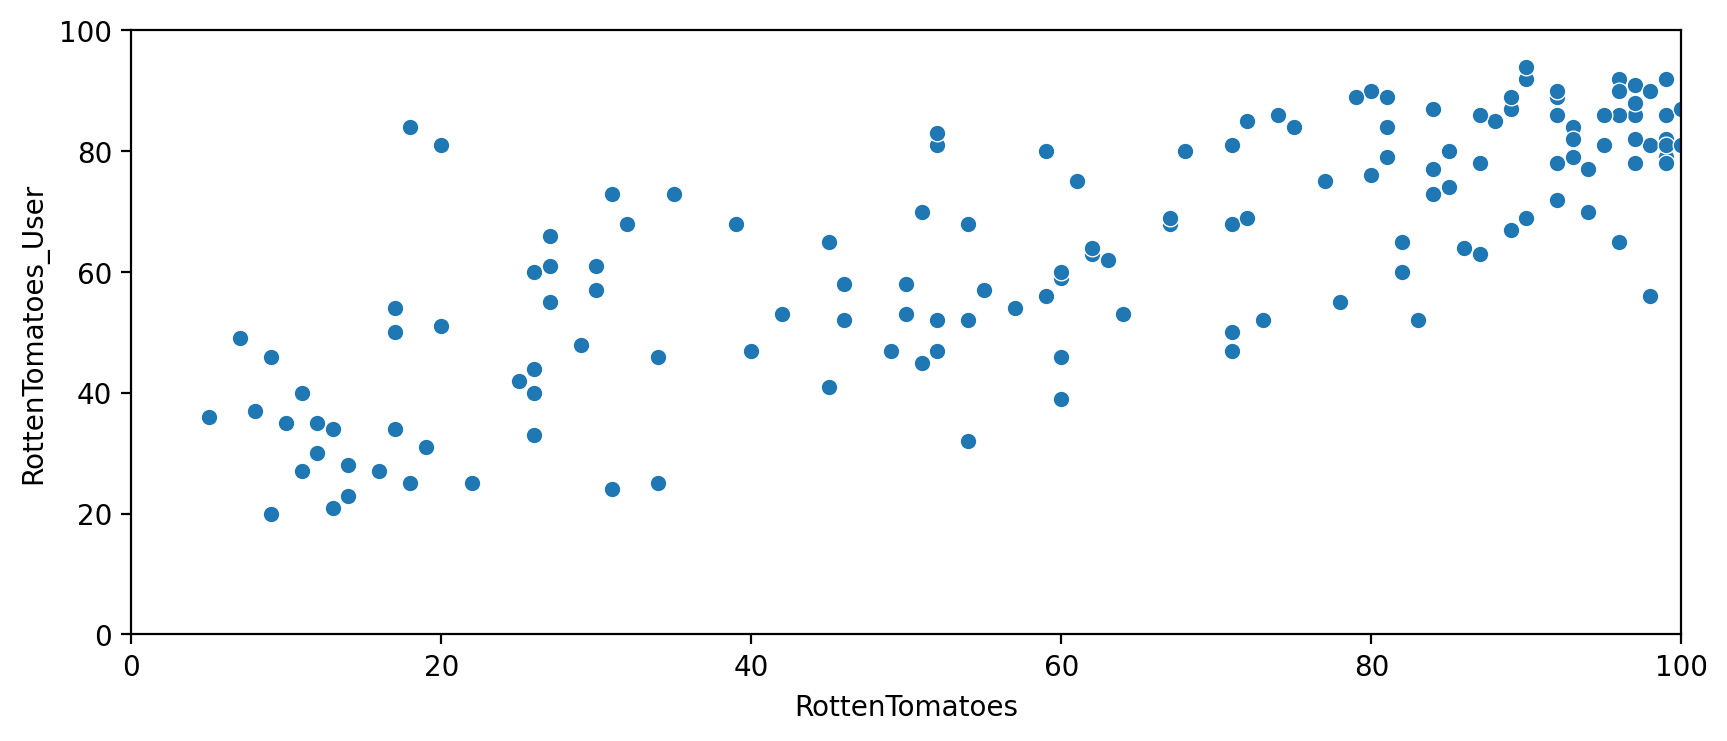

In [44]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = rating_sites, y='RottenTomatoes_User', x = 'RottenTomatoes')
plt.ylim(0,100)
plt.xlim(0,100)

In [45]:
#new column for the difference between the RottenTomatoes_User and the RottenTomatoes
rating_sites['critics_difference'] = rating_sites['RottenTomatoes'] - rating_sites['RottenTomatoes_User']
rating_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


In [46]:
#getting the abs value of the new column
rating_sites['abs_critics_difference'] = rating_sites['critics_difference'].apply(abs)

Plot for the distribution between the Rotten Tomatoes User Score and the Rotten Tomatoes score 

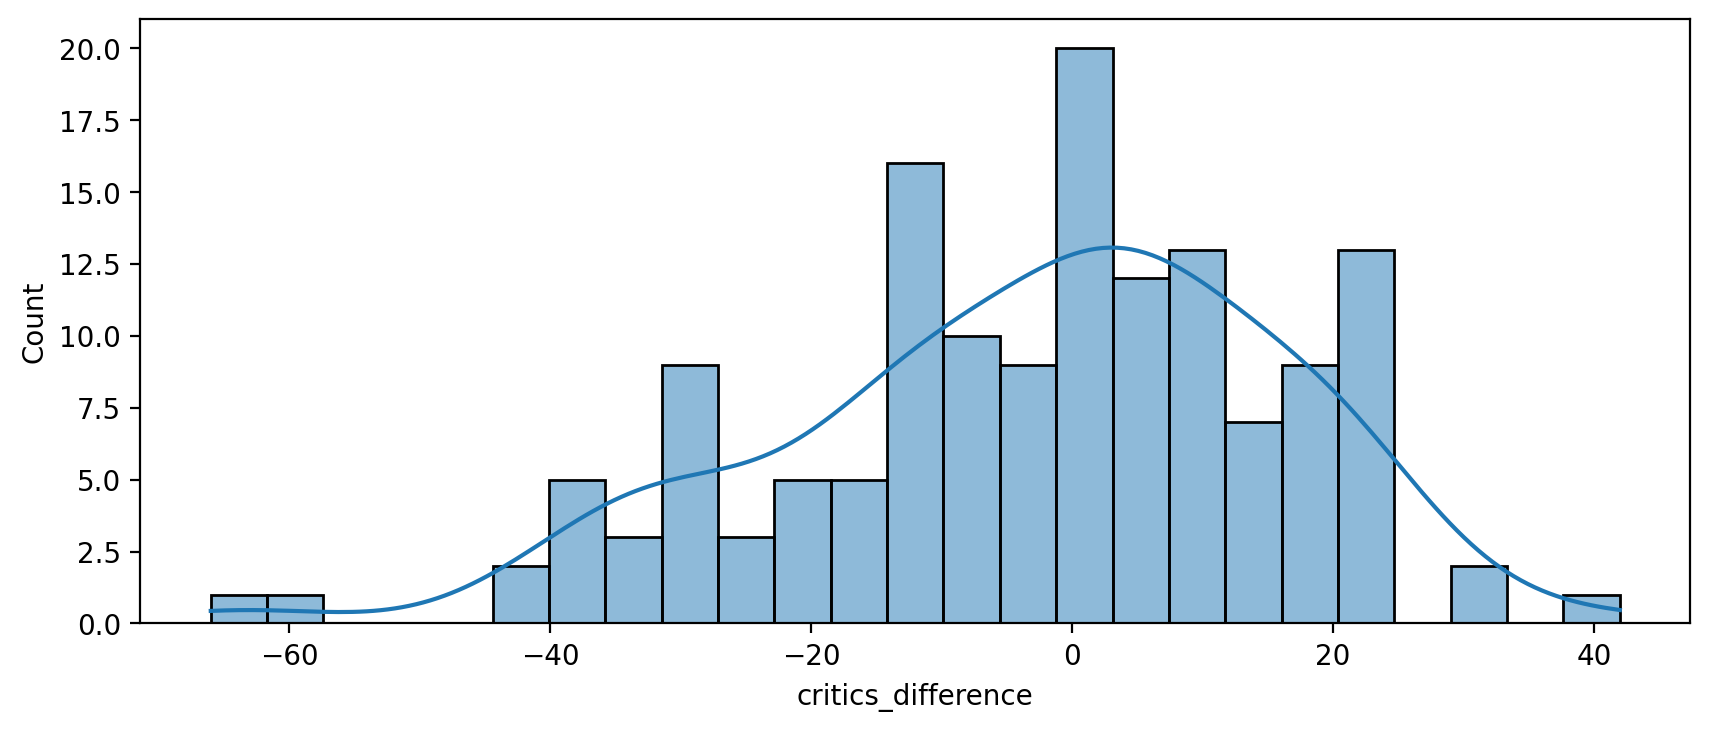

In [48]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = rating_sites, x= 'critics_difference',kde= True,bins = 25)
plt.show()

Plot for the absolute value of the critics difference

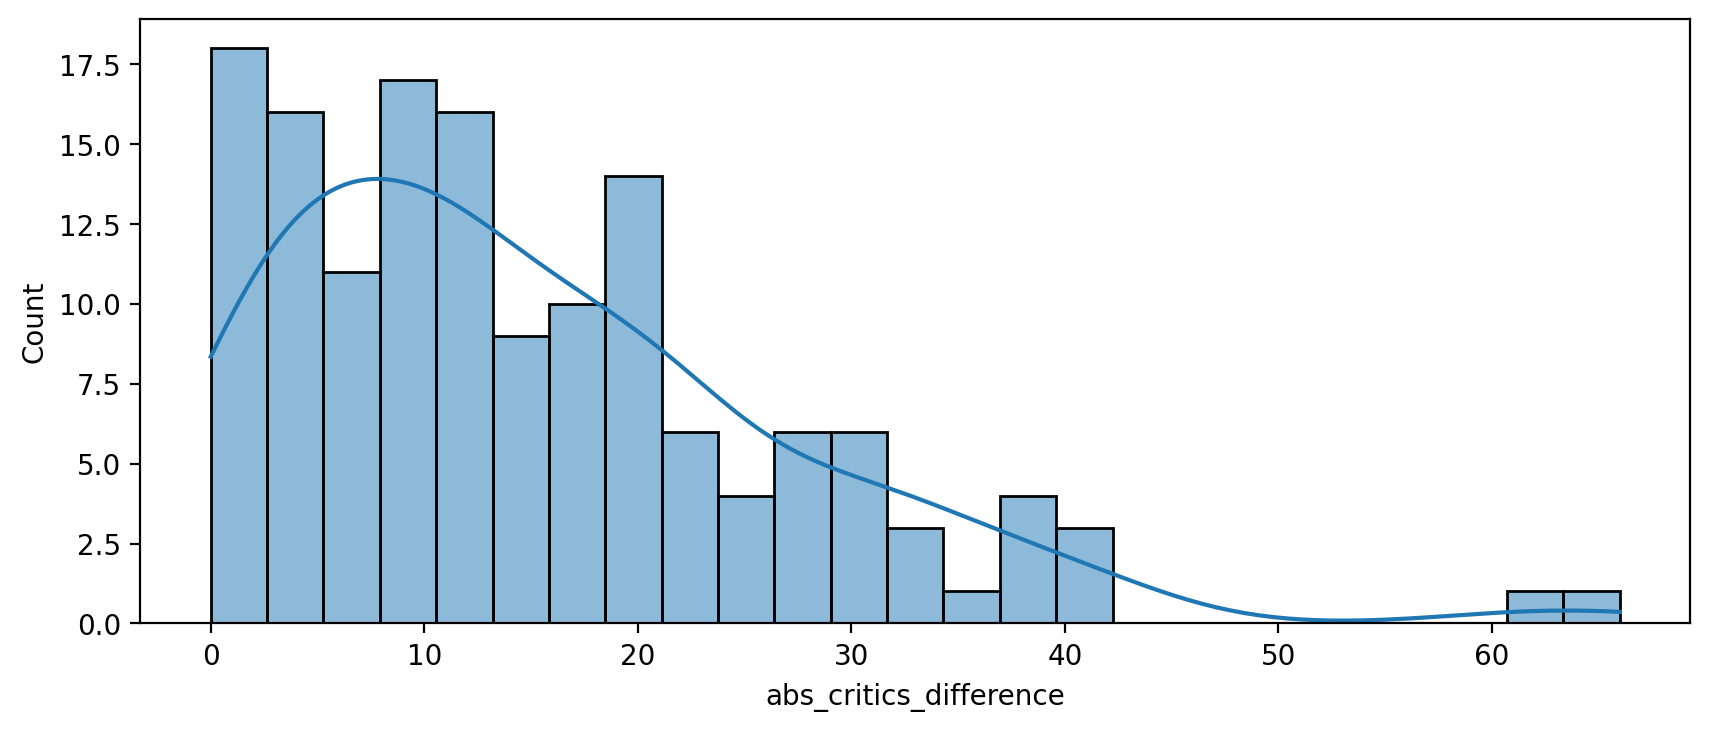

In [49]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = rating_sites, x= 'abs_critics_difference',kde= True,bins = 25)
plt.show()

We see there are some movies that have a huge difference in critis

In [50]:
#getting the movies that the users liked but the critics hated
rating_sites.nsmallest(5,'critics_difference')[['FILM','critics_difference']]

,FILM,critics_difference
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [51]:
#getting the movies that the users hated but the critics liked
rating_sites.nlargest(5,'critics_difference')[['FILM','critics_difference']]

,FILM,critics_difference
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## Metacritic

Plot for the distribution between the Metacritic User Score and the Metacritic score 

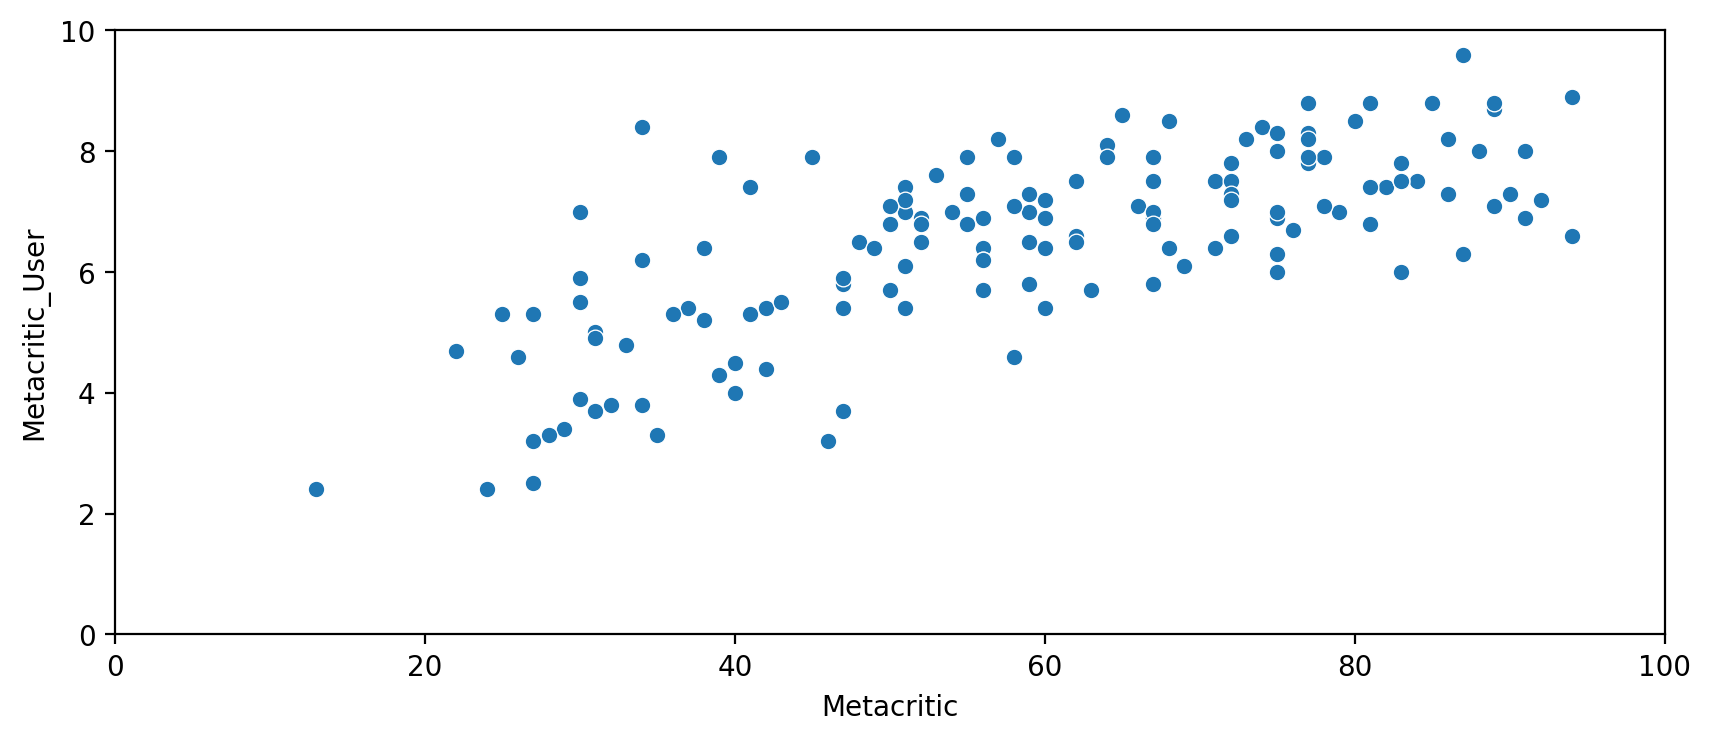

In [53]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data= rating_sites, x='Metacritic', y ='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)
plt.show()

## IMDB

Plot for the distribution between the Metacritic User Vote Count and the IMDB User Vote Count

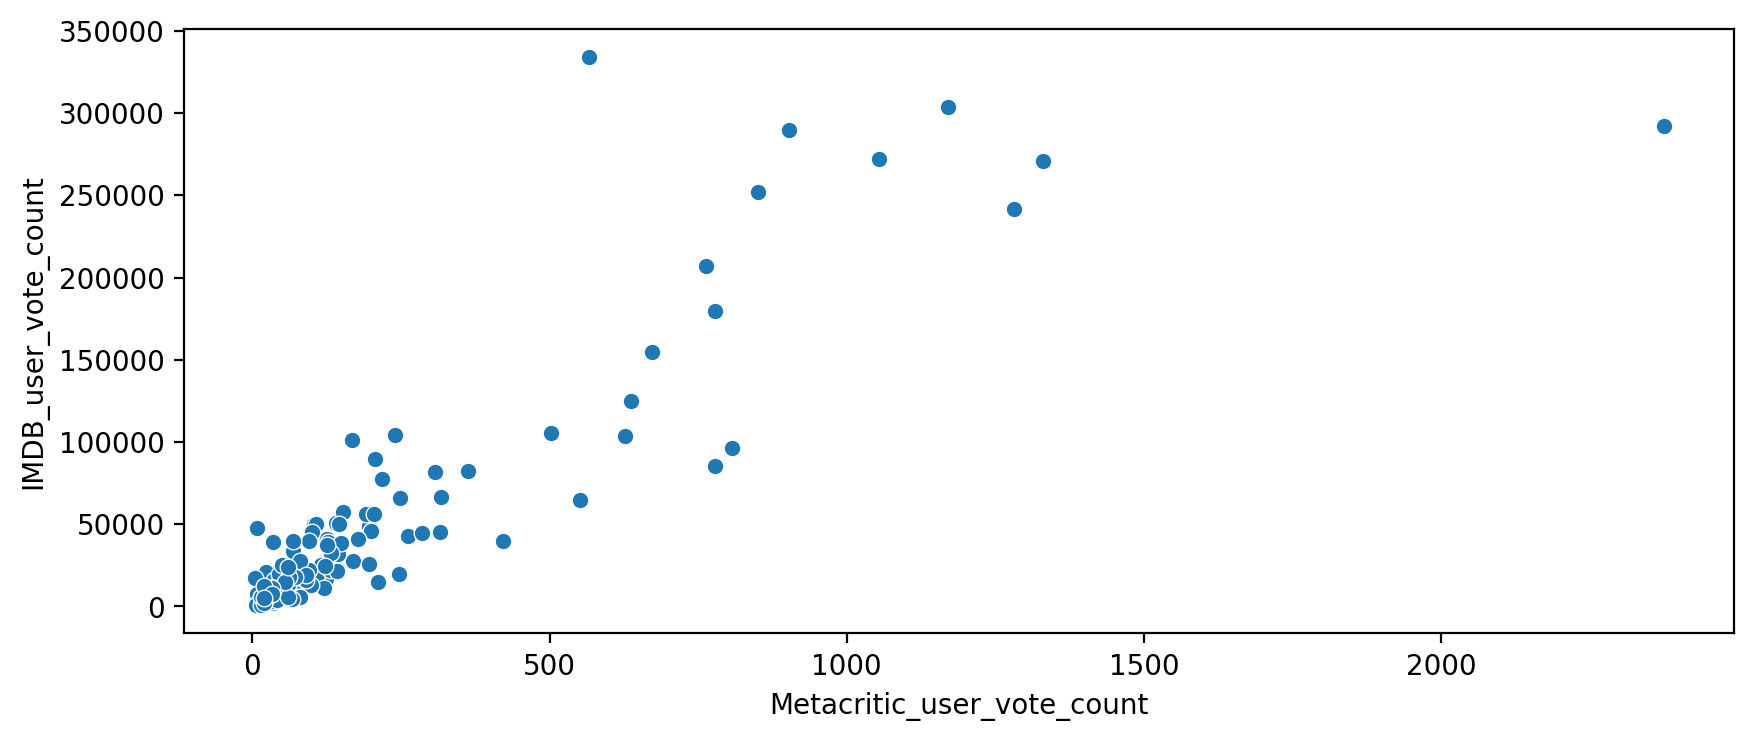

In [55]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data= rating_sites, y='IMDB_user_vote_count', x='Metacritic_user_vote_count')
plt.show()

There 2 data points that are outliner.

First point with low Metacritic user vote count but high IMDB user vote count

In [58]:
rating_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_difference,abs_critics_difference
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


Second point with high IMDB user vote count but way higher Metacritic user vote count than other movies

In [57]:
rating_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_difference,abs_critics_difference
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandango Rating VS All Other Sites

In [60]:
#merging the 2 dataFrames
all_data = pd.merge(fandango_data, rating_sites, on='FILM', how = 'inner')

In [62]:
all_data.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_difference,abs_critics_difference
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8


Since now all rating are in one DF, we need to normalize all rating/scores to a unique score between all sites in order to compare. 

In [64]:
#RottenTomatoes (max value in 100, dividing by 20 to scale it to 5)
all_data['RT_Normalized'] = np.round(all_data['RottenTomatoes']/20,1)
all_data['RTU_Normlized'] = np.round(all_data['RottenTomatoes_User']/20,1)

In [68]:
#Metacritic (max value of the Metacritic score is 100, max value of the Metacritic user score is 10)
all_data['Meta_Normalized'] = np.round(all_data['Metacritic']/20,1)
all_data['METAU_Normalized'] = np.round(all_data['Metacritic_User']/2,1)

In [69]:
#IMDB (max value is 5)
all_data['IMDB_Normalized'] = np.round(all_data['IMDB']/2,1)

In [70]:
all_data.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,critics_difference,abs_critics_difference,RT_Normalized,RTU_Normlized,Meta_Normalized,METAU_Normalized,IMDB_Normalized
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,4.9,4.5,4.7,4.4,4.3


In [77]:
all_data.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'critics_difference', 'abs_critics_difference', 'RT_Normalized',
       'RTU_Normlized', 'Meta_Normalized', 'METAU_Normalized',
       'IMDB_Normalized'],
      dtype='object')

In [80]:
#dataFrame for only the normalized values
normazlied_scores = all_data[['STARS','RATING','RT_Normalized',
       'RTU_Normlized', 'Meta_Normalized', 'METAU_Normalized',
       'IMDB_Normalized']]

In [82]:
normazlied_scores.head()

,STARS,RATING,RT_Normalized,RTU_Normlized,Meta_Normalized,METAU_Normalized,IMDB_Normalized
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


Comparing distribution between all scores

In [86]:
#moving the legend, found on github https://github.com/mwaskom/seaborn/issues/2280 
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

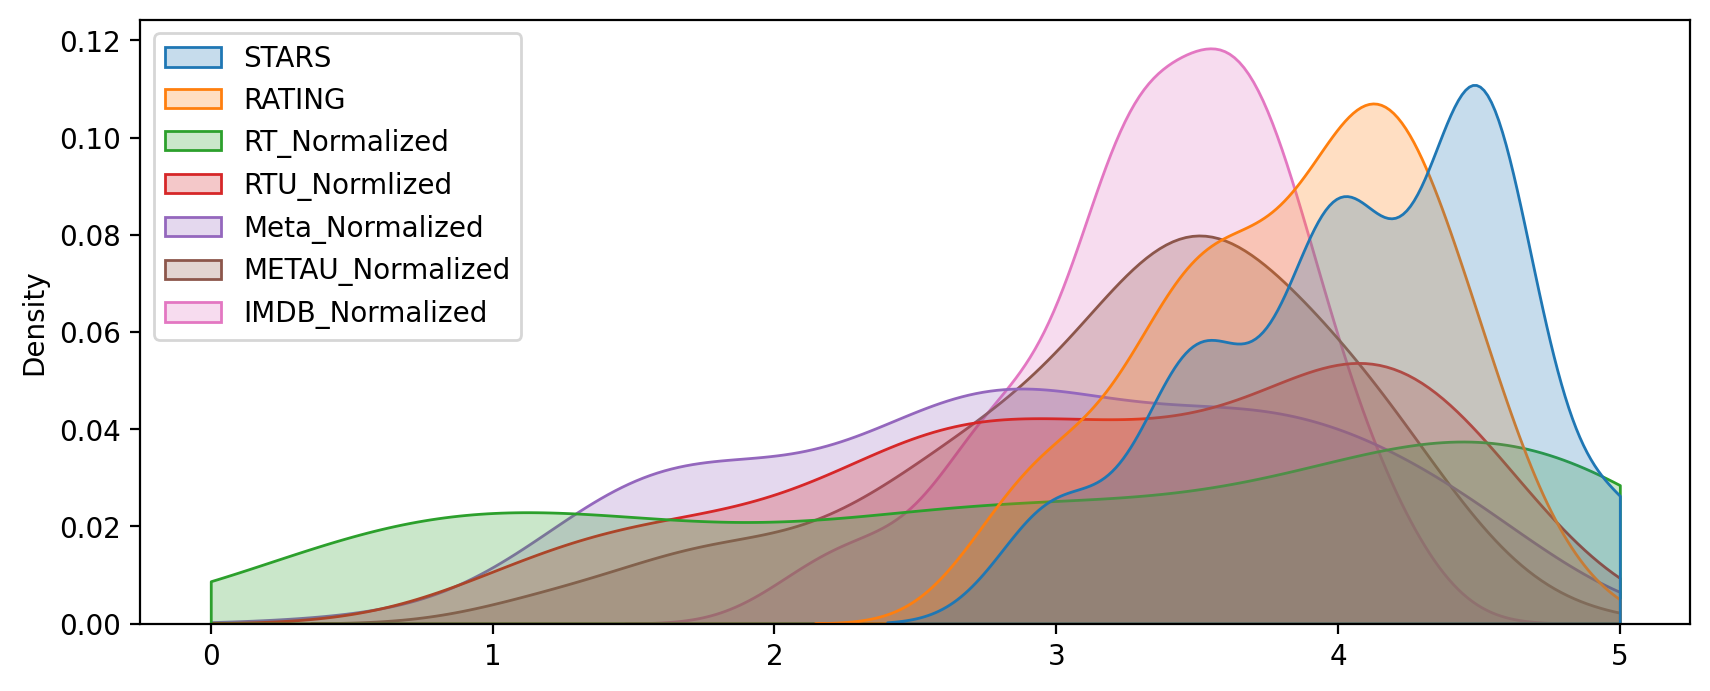

In [87]:
fig,ax = plt.subplots(figsize = (10,4), dpi =200)
sns.kdeplot(data= normazlied_scores,fill=True,clip =[0,5])
move_legend(ax, "upper left")
plt.show()

The plot clrearly shows the even distribution with Rotten Tomatoes, however Fandango has an unven distribution with very minimal 2 STARS rating movies

KDE plot to compare between the Rotten Tomatoes and the STARS 

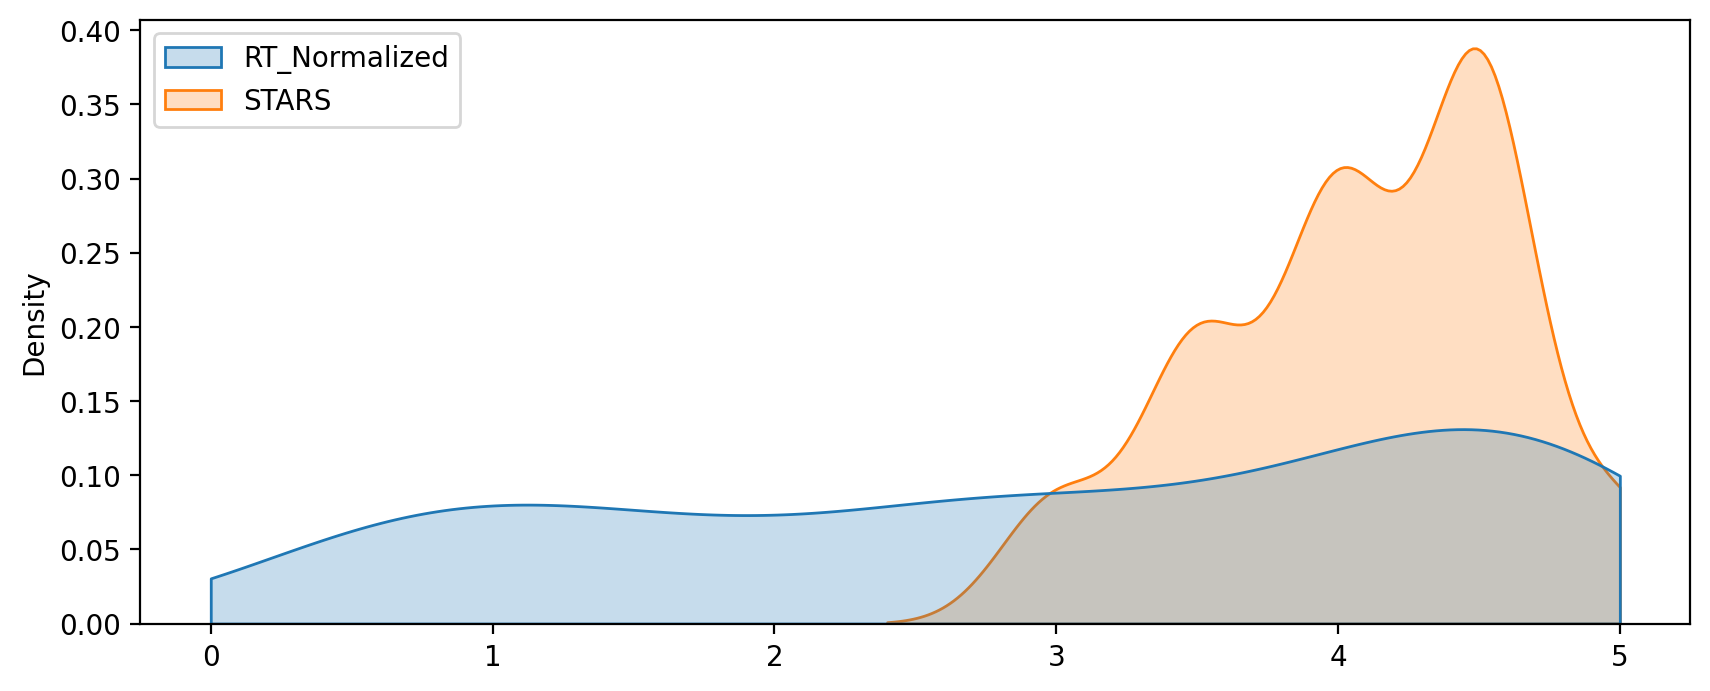

In [89]:
fig,ax = plt.subplots(figsize = (10,4), dpi =200)
sns.kdeplot(data= normazlied_scores[['RT_Normalized','STARS']],fill=True,clip =[0,5])
move_legend(ax, "upper left")
plt.show()

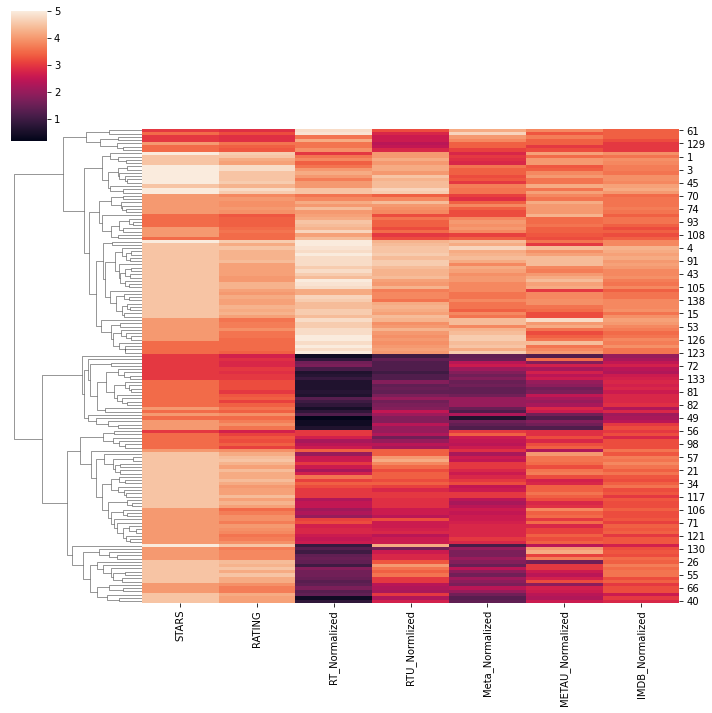

In [93]:
sns.clustermap(normazlied_scores,col_cluster = False)

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. 

Getting the worst 10 movies based on rating by Rotten Tomatoes

In [101]:
normazlied_films = all_data[['FILM','STARS','RATING','RT_Normalized','RTU_Normlized', 'Meta_Normalized', 'METAU_Normalized',
'IMDB_Normalized']]
normazlied_films.nsmallest(10,'RT_Normalized')

,FILM,STARS,RATING,RT_Normalized,RTU_Normlized,Meta_Normalized,METAU_Normalized,IMDB_Normalized
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


Visualizing the distribution of ratings across all sites for the top 10 worst movies.

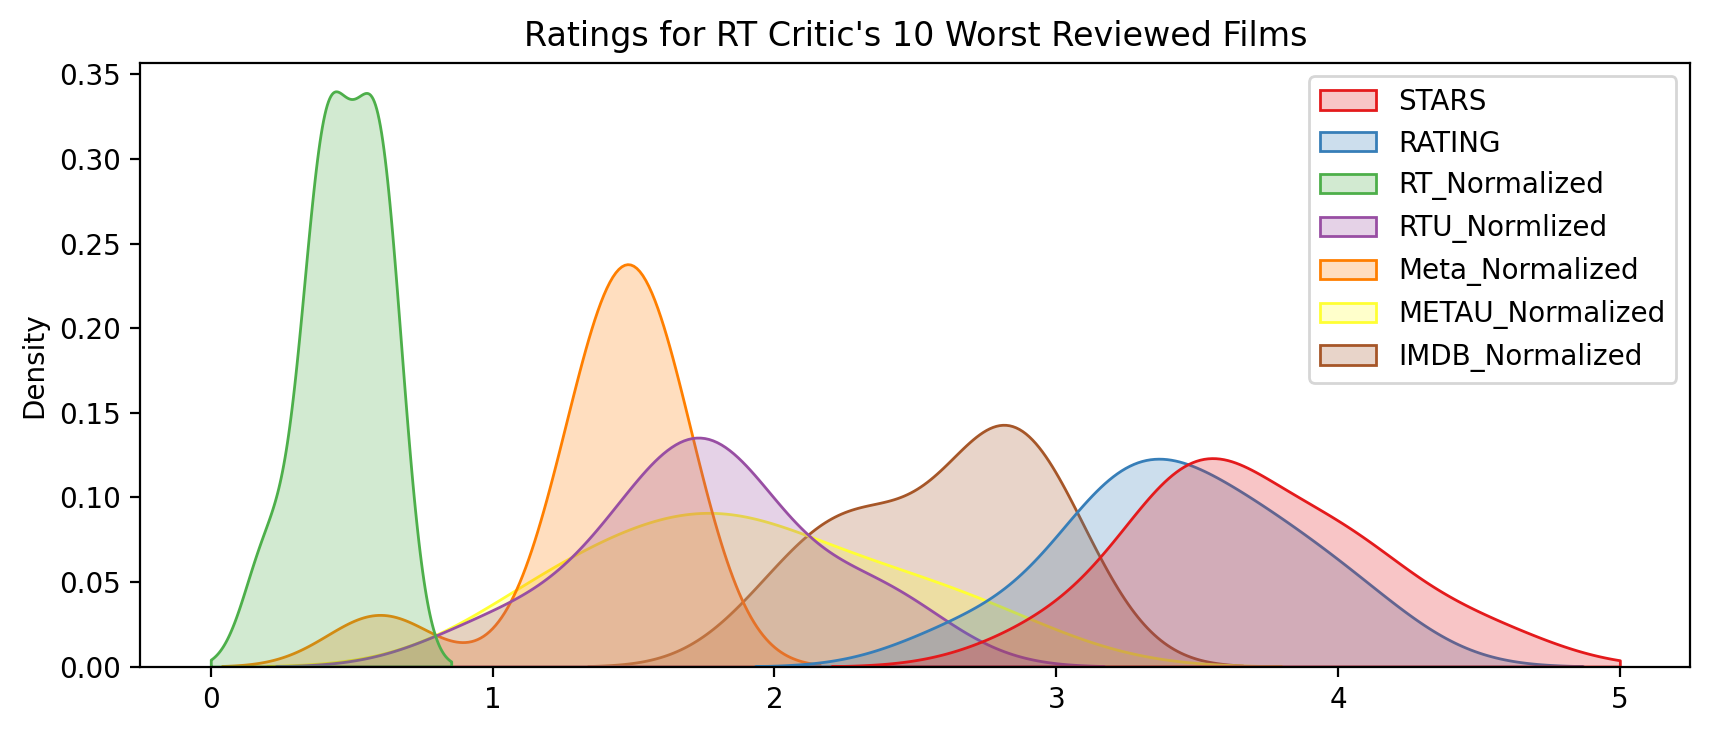

In [103]:
plt.figure(figsize=(10,4),dpi=200)
worst_films = normazlied_films.nsmallest(10,'RT_Normalized').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

**Final conclusion: Fandango is showing 3-5 stars for the 10 worst movies by rating on Rotten Tomatoes**